# FINDING THE BEST RESTRO BY ANALYZING ZOMATO DATA FOR FEW CITIES USING TKINTER

In [88]:
import tkinter as tk
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from Zomato import ahemdabad


root= tk.Tk() 
def click():
    data = pd.read_csv('C:\\Users\\dell\\Downloads\\zomato-india-data-set\\Ahmedabad\\combined_csv.csv')
    data = data.replace(to_replace='none', value=np.nan).dropna()
    data1 = data.drop(['URL', 'PAGE NO'], axis = 1)
    data2 = data1[(data1.RATING != '-') & (data1.RATING != 'Opening') & (data1.RATING != 'NEW')]
    figure1 = plt.Figure(figsize=(6,5), dpi=100)
    ax1 = figure1.add_subplot(111)
    bar1 = FigureCanvasTkAgg(figure1, root)
    bar1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
    data2['PRICE'][:30].plot(kind='bar', legend=True, ax=ax1)
    ax1.set_title('Top 30 Price values counts')
    
    figure1 = plt.Figure(figsize=(6,5), dpi=100)
    ax1 = figure1.add_subplot(111)
    bar1 = FigureCanvasTkAgg(figure1, root)
    bar1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
    data2['VOTES'] = data2['VOTES'].astype('int')
    data2['VOTES'][:30].plot(kind='bar', legend=True, ax=ax1)
    ax1.set_title('Top 30 Vote(no.of sales) values counts')

    
def label():
    y = ahemdabad.output2()
    w = tk.Label(root, text= y)
    w.pack()
    

root.title("Welcome to Zomato data analysis!")
w1 = tk.Label(root, text= 'Check out great restaurants at Ahmedabad..')
w1.pack()
button1 = Button(root, text="CHECK THE TOP RESTAURANT!!", command=label, bg = 'red')
button1.pack()
button2 = Button(root, text="CLICK TO VIEW THE GRAPH", command=click, bg = 'black', fg = 'white')
button2.pack()

root.mainloop()

# ANALYZING ZOMATO DATA USING MATPLOTLIB AND SEABORN MODULES

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
one = pd.read_csv('C:\\Users\\dell\\Downloads\\zomato-india-data-set\\Ahmedabad\\combined_csv.csv')
two = pd.read_csv('C:\\Users\\dell\\Downloads\\zomato-india-data-set\\Agra\\combined_csv.csv')
three = pd.read_csv('C:\\Users\\dell\\Downloads\\zomato-india-data-set\\Bengaluru\\combined_csv.csv')
four = pd.read_csv('C:\\Users\\dell\\Downloads\\zomato-india-data-set\\Chennai\\combined_csv.csv')
five = pd.read_csv('C:\\Users\\dell\\Downloads\\zomato-india-data-set\\Delhi NCR\\combined_csv.csv')
six = pd.read_csv('C:\\Users\\dell\\Downloads\\zomato-india-data-set\\Hyderabad\\combined_csv.csv')
seven = pd.read_csv('C:\\Users\\dell\\Downloads\\zomato-india-data-set\\Nashik\\combined_csv.csv')
eight = pd.read_csv('C:\\Users\\dell\\Downloads\\zomato-india-data-set\\Jaipur\\combined_csv.csv')

In [31]:
#combining few data from different cities and analyzing it as whole.
lis = [one.head(40), two.head(40), three.head(40), four.head(40), five.head(40), six.head(40), seven.head(40), eight.head(40)]
result = pd.concat(lis)
result = result.replace(to_replace='none', value=np.nan).dropna()
result.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Eat Punjab,750,"North Indian,Chinese,Fast Food",Ahmedabad,Chandkheda,https://www.zomato.com/ahmedabad/eat-punjab-ch...,1,Casual Dining,"1030am to 330pm,630pm to 1130pm(Mon-Sun)",Good,3.7,1345
1,9834 The Fruit Truck,400,"Beverages,Desserts",Ahmedabad,Food Truck Park,https://www.zomato.com/9834-the-fruit-truck-fo...,1,Food Truck,9am to 1am(Mon-Sun),Very Good,4.4,561
2,The Esplendido Cafe,800,"Cafe,American,Italian,Chinese,Beverages",Ahmedabad,Navrangpura,https://www.zomato.com/ahmedabad/the-esplendid...,1,Café,"1130am to 1130pm(Mon-Tue),12noon to 1130pm...",Very Good,4.4,1013
3,Makeba - The Lounge Cafe,1000,"Cafe,Italian,Mexican,Healthy Food",Ahmedabad,Vastrapur,https://www.zomato.com/ahmedabad/makeba-the-lo...,1,Café,12noon to 12midnight(Mon-Sun),Very Good,4.2,399
4,Honest,700,"North Indian,South Indian,Fast Food,Chinese",Ahmedabad,Prahlad Nagar,https://www.zomato.com/ahmedabad/honest-prahla...,1,Casual Dining,11am to 12midnight(Mon-Sun),Good,3.9,832


# Let's check what all cases we can drew from the data

Text(0.5,0,'Count')

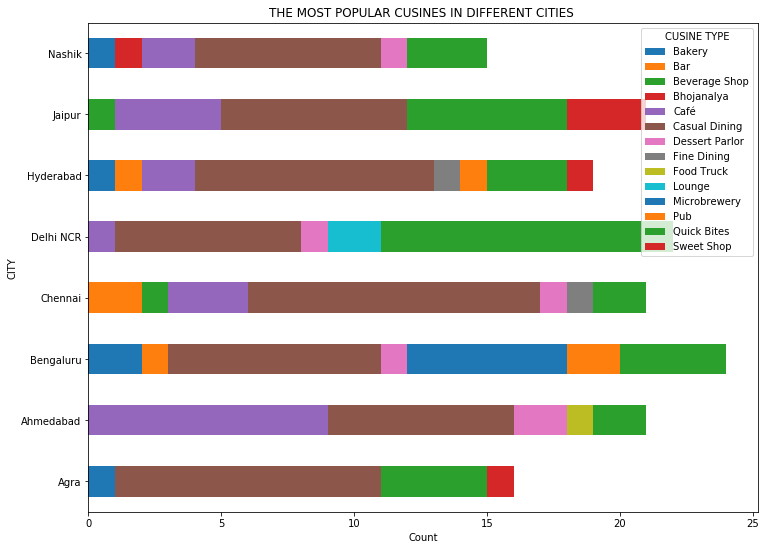

In [33]:
from pylab import rcParams
new = result[result['RATING'] >= '4.0']
rcParams['figure.figsize'] = 12, 9
new.groupby(['CITY','CUSINE TYPE']).size().unstack().plot(kind='barh',stacked=True, title = 'THE MOST POPULAR CUSINES IN DIFFERENT CITIES ')
plt.xlabel('Count')
#checking what people are really fond of at different cities.

Text(0.5,1,'In general rating of Zomato food')

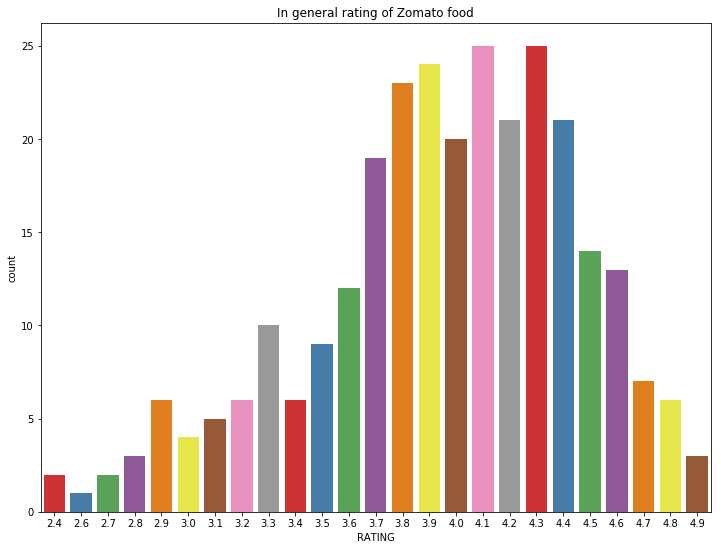

In [34]:
result = result[(result.RATING != '-') & (result.RATING != 'Opening') & (result.RATING != 'NEW')]
rcParams['figure.figsize'] = 12, 9
sns.countplot(result['RATING'], palette = 'Set1')
plt.title('In general rating of Zomato food')

Text(0.5,0,'Count')

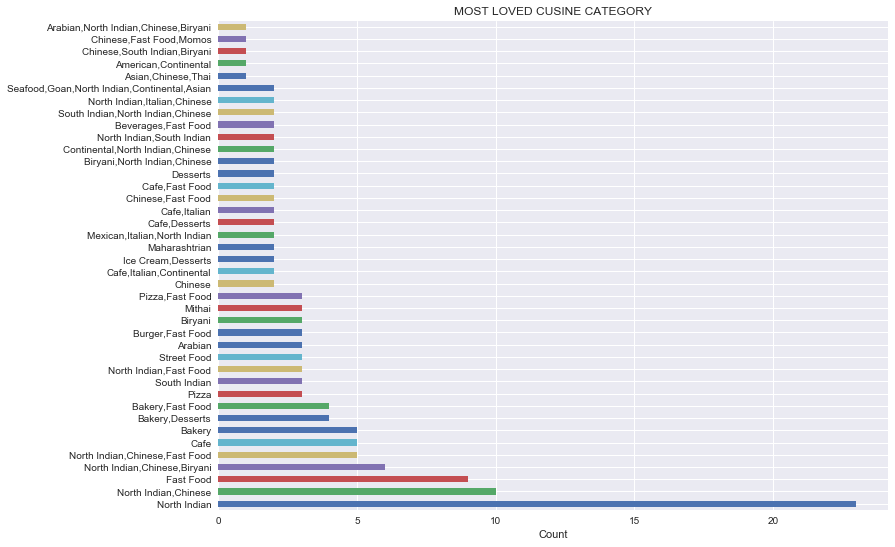

In [37]:
result['CUSINE_CATEGORY'].value_counts()[:40].plot(kind='barh', title = 'MOST LOVED CUSINE CATEGORY')
plt.xlabel('Count')
#all over north indian is loved

C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Average Price for each restaurant')

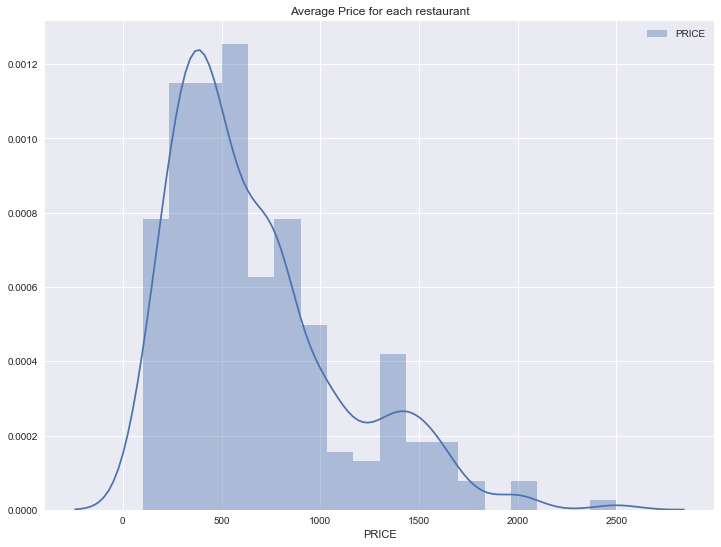

In [38]:
rcParams['figure.figsize'] = 12, 9
sns.set()
sns.distplot(result['PRICE'], label = 'PRICE')
plt.legend()
plt.title('Average Price for each restaurant')
#average amount spent on each restaurant is between 300-700

# Data analysis of Ahmedabad

Text(0.5,0,'Count')

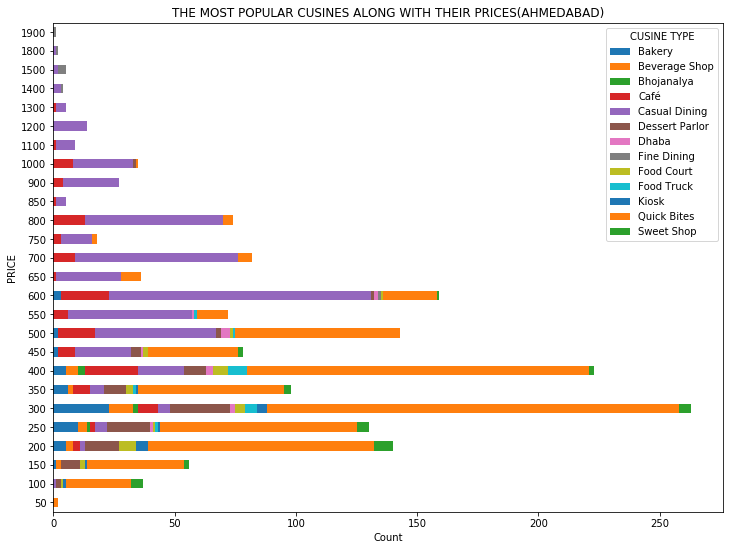

In [27]:
#importing data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import rcParams
%matplotlib inline
data = pd.read_csv('C:\\Users\\dell\\Downloads\\zomato-india-data-set\\Ahmedabad\\combined_csv.csv')
#printing the first 5 values
data.head()

data = data.replace(to_replace='none', value=np.nan).dropna()
#removing unwanted columns: ['URL', 'PAGE NO']
data1 = data.drop(['URL', 'PAGE NO'], axis = 1)
data1.shape


#checking the counts for different values of ratings (eg : rating 3.4 appears 178 times)
data1.RATING.value_counts()



#removing unwanted values from rating column
data2 = data1[(data1.RATING != '-') & (data1.RATING != 'Opening') & (data1.RATING != 'NEW')]
rcParams['figure.figsize'] = 12, 9

data2.groupby(['PRICE','CUSINE TYPE']).size().unstack().plot(kind='barh',stacked=True, title = 'THE MOST POPULAR CUSINES ALONG WITH THEIR PRICES(AHMEDABAD)')
plt.xlabel('Count')
#checking what people are really fond of at the best and affordable price.

Text(0.5,0,'Count')

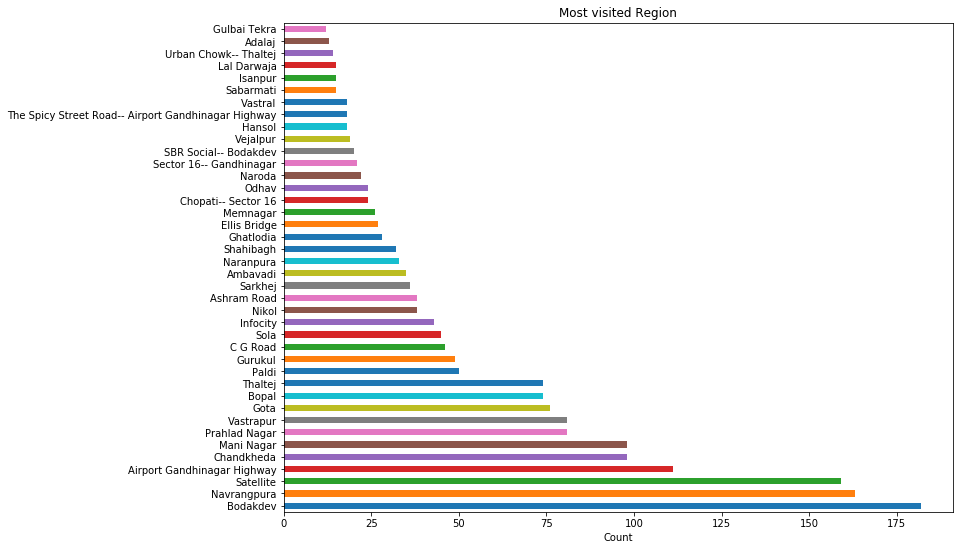

In [28]:
rcParams['figure.figsize'] = 12, 9
data1['REGION'].value_counts()[:40].plot(kind='barh')
plt.title('Most visited Region')
plt.xlabel('Count')
#Places where most people visits.

Text(0.5,0,'Count')

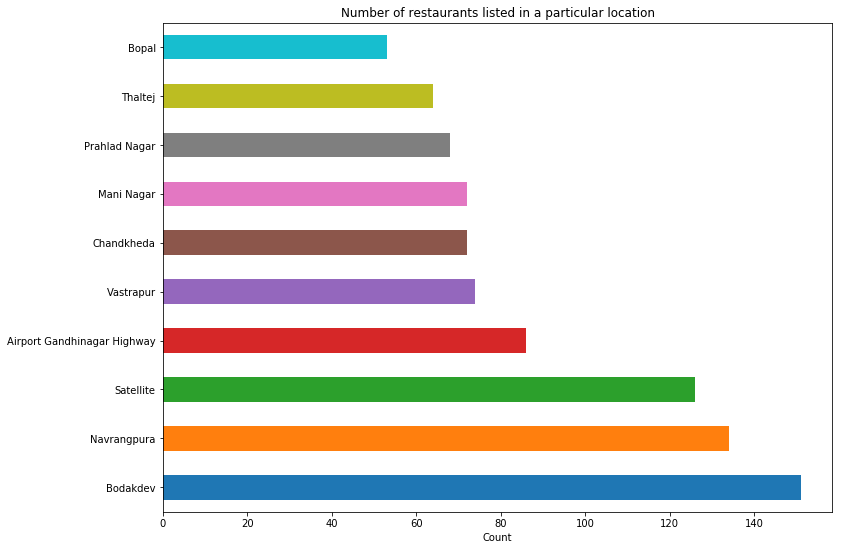

In [29]:
plt.figure(figsize = (12,9))
data2.REGION.value_counts().nlargest(10).plot(kind ='barh')
plt.title('Number of restaurants listed in a particular location')
plt.xlabel('Count')
#region where you may find most of the restaurants.